In [3]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [5]:
baseline_K_val = [1, 4, 7, 10, 13]
SUBJECT = "Carlson"

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.ModelTrainer(config, subject=f"{SUBJECT}")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_C.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/18 - Session Exp_2025-06-30-v1/E9AD0E7DCC2B/
(8493, 4, 14, 1) (8493,) (86, 4, 14, 1) (86,)
Dataset 2/18 - Session Exp_2025-06-30-v2/E9AD0E7DCC2B/
second (8493, 4, 14, 1) (8493,) (86, 4, 14, 1) (86,)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 84.61%
Maximum validation accuracy : 88.37%
Accuracy of test dataset using model V0: 88.3721%
Dataset 3/18 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.8741%
Dataset 4/18 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 83.6309%
Dataset 5/18 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 80.9734%
Dataset 6/18 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.4818%
Dataset 7/18 - Session Exp_2025-07-11-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.2617%
Dataset 8/18 - Session Exp_2025-07-11-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 83.8181%
Dataset 9/18 - Session Exp_2025-07-16-v1/E9AD0

In [6]:
b_path = 'C:/Users/hml76/PycharmProjects/MindForce/'
baseline_K = ['1', '4', '7', '10', '13']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_C.csv')

In [7]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
pd.DataFrame(Trained_acc_all).to_csv(f'../../Results/Results_{SUBJECT}/Train_Test_per_sessions.csv', index=False)


Dataset 1/18 - Session Exp_2025-06-30-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 80.7%
Maximum validation accuracy : 81.04%

Dataset 2/18 - Session Exp_2025-06-30-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 82.46%
Maximum validation accuracy : 83.24%

Dataset 3/18 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.57%
Maximum validation accuracy : 86.43%

Dataset 4/18 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.39%
Maximum validation accuracy : 87.2%

Dataset 5/18 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.06%
Maximum validation 

In [8]:
for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")

Average of acc without training anything (should be random): 12.30%
Average of acc using previous test data after training: 82.33%
Average of acc using current test data after training: 86.52%
K-1: 84.71% | Target: 86.84
K-4: 85.20% | Target: 87.10
K-7: 86.46% | Target: 87.60
K-10: 88.37% | Target: 88.52
K-13: 88.64% | Target: 89.65


In [ ]:
np.array(baseline_result['Info'])

In [9]:
Trained_acc_all

[0.8104453086853027,
 0.8324286341667175,
 0.8643006086349487,
 0.8720148205757141,
 0.8329084515571594,
 0.8589298129081726,
 0.8663423657417297,
 0.8659842014312744,
 0.8298171758651733,
 0.8589231371879578,
 0.8591907620429993,
 0.8996988534927368,
 0.8400927186012268,
 0.8692129850387573,
 0.9302433133125305,
 0.9009259343147278,
 0.8838395476341248,
 0.8982021808624268]

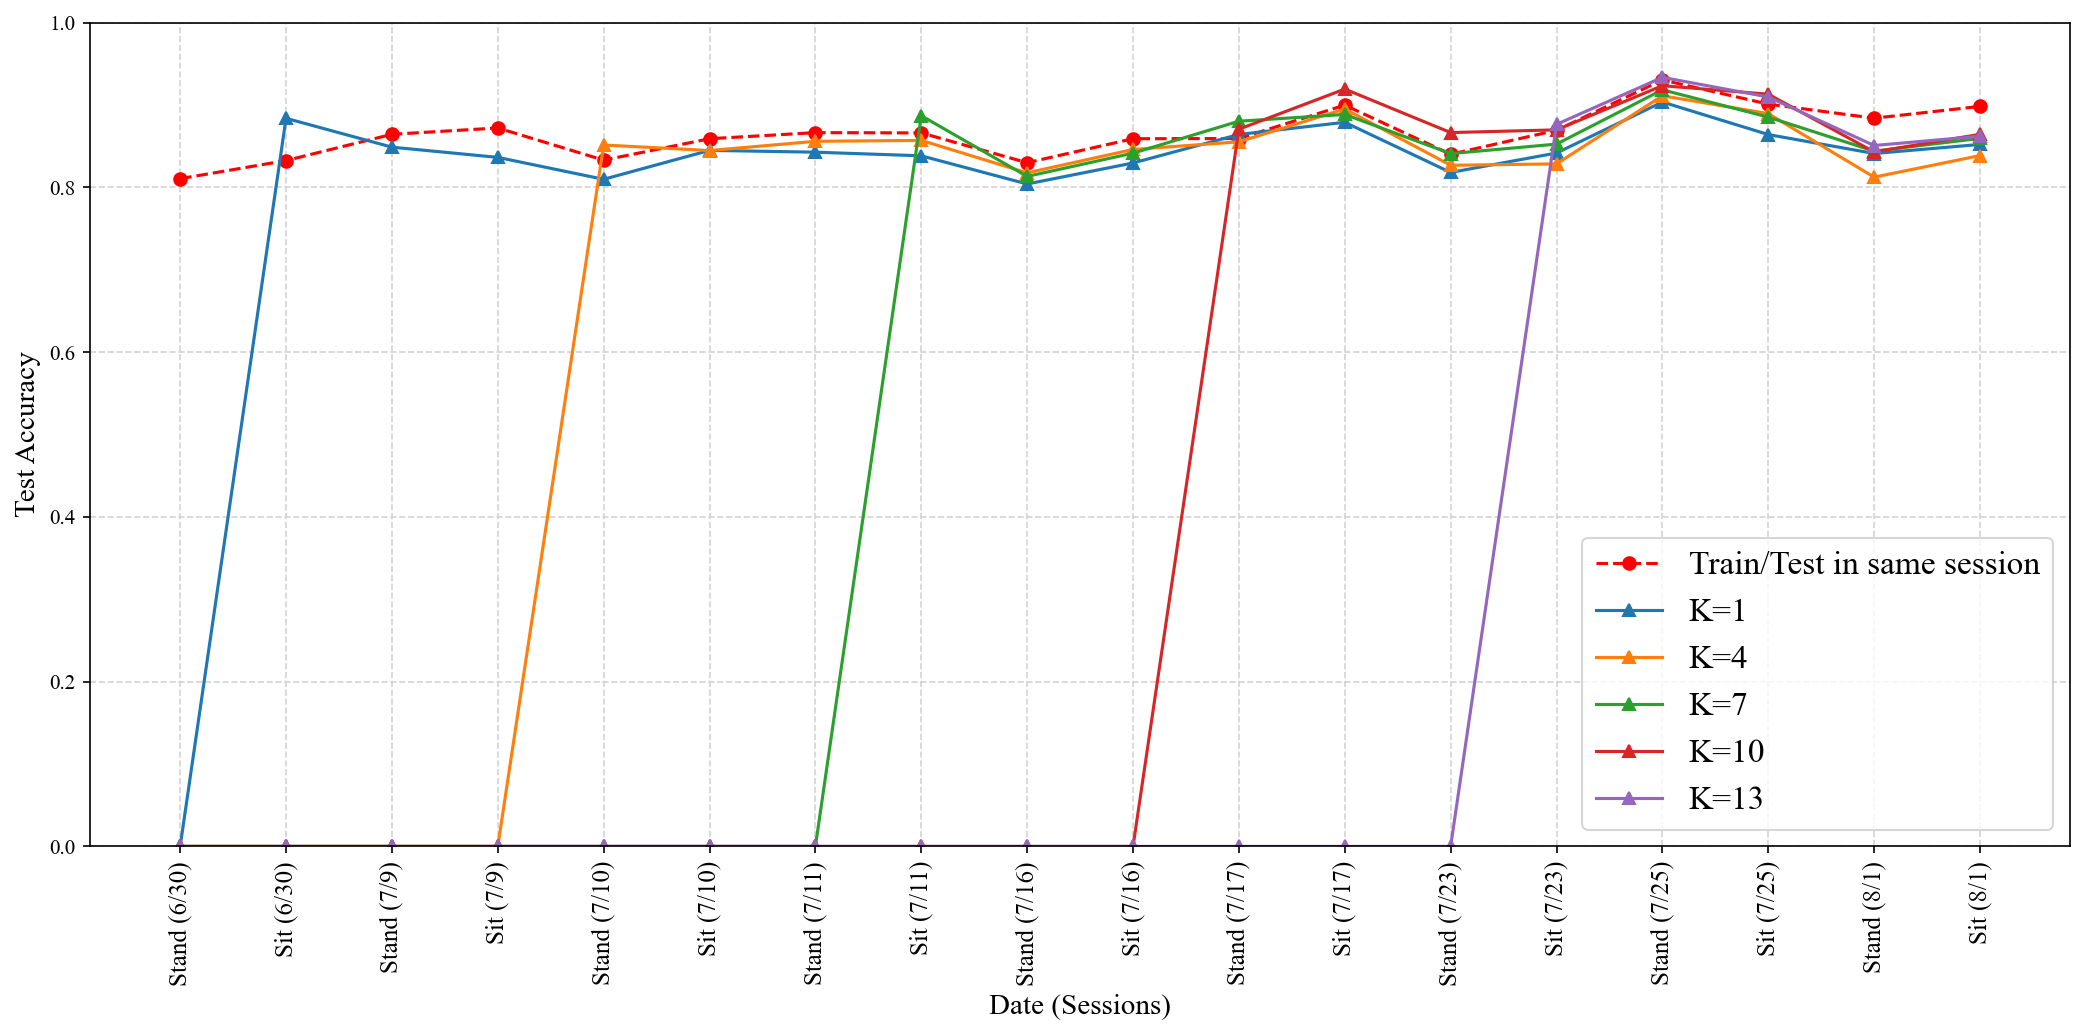

In [10]:
import matplotlib.pyplot as plt

Trained_acc_all_stored = [0.8104453086853027, 0.8324286341667175, 0.8643006086349487, 0.8720148205757141, 0.8329084515571594, 0.8589298129081726, 0.8663423657417297, 0.8659842014312744, 0.8298171758651733, 0.8589231371879578, 0.8591907620429993, 0.8996988534927368, 0.8400927186012268, 0.8692129850387573, 0.9302433133125305,0.9009259343147278, 0.8838395476341248, 0.8982021808624268]

X_labels = ['Stand (6/30)', 'Sit (6/30)', 'Stand (7/9)', 'Sit (7/9)', 'Stand (7/10)', 'Sit (7/10)', 'Stand (7/11)', 'Sit (7/11)',
            'Stand (7/16)', 'Sit (7/16)', 'Stand (7/17)', 'Sit (7/17)', 'Stand (7/23)', 'Sit (7/23)', 'Stand (7/25)', 'Sit (7/25)', 'Stand (8/1)', 'Sit (8/1)']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 7), dpi=150)
#plt.title('Training from scratch every time', fontsize=15)
plt.plot(Trained_acc_all_stored, c='red', label='Train/Test in same session', marker='o', linestyle='--')
for idx, base in enumerate(baselines):
    baseline_result = pd.read_csv(base)
    plt.plot(X_labels, baseline_result['Accuracy'] / 100, marker='^', label=f'K={baseline_K[idx]}', linestyle='-')

plt.ylim([0, 1])
plt.xlabel('Date (Sessions)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=16, ncol=1, loc='lower right')
plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()